# Index of Runs and Variables

These notebooks document model runs that are avaiable for analysis.

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets, interact, fixed, interactive
from IPython.display import display, HTML
import tqdm

Currently, the cookbook searches for NetCDF4 files in the following directories

In [2]:
cc.netcdf_index.directoriesToSearch

['/g/data3/hh5/tmp/cosima/', '/g/data1/v45/APE-MOM']

We first generate a database of all variables in all netCDF4 files found within these directories. Note that this needs only be called once as the database will persist between sessions.  If new output files are added to the data directories, build_index() will only important the new files.

If this database ever becomes corrupted, it can be be safely deleted and will be recreated whenever build_index() is next called.

In [3]:
cc.build_index()

Searching /g/data3/hh5/tmp/cosima/
Searching /g/data1/v45/APE-MOM
Found 38641 .nc files
Using database sqlite:////g/data1/v45/cosima-cookbook/cosima-cookbook.db
Files already indexed: 38232
Files found but not yet indexed: 409
Indexing new .nc files...


ValueError: No clients found
Start an client and point it to the scheduler address
  from distributed import Client
  client = Client('ip-addr-of-scheduler:8786')


This index of all variables is stored in a SQL database. If needed, it can be accessed directly using the `dataset` module.

In [6]:
cc.netcdf_index.database_file

'/g/data1/v45/cosima-cookbook/cosima-cookbook.db'

In [7]:
db = dataset.connect(cc.netcdf_index.database_url)

In [8]:
rows = db.query('select * from ncfiles where variable = "tau_x" and experiment = "025deg_jra55_ryf_spinup1" limit 5')
for row in rows:
    print(row)

OrderedDict([('id', 87074), ('ncfile', '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup1/output003/ocean/ocean_month.nc'), ('rootdir', '/g/data3/hh5/tmp/cosima'), ('configuration', 'access-om2-025'), ('experiment', '025deg_jra55_ryf_spinup1'), ('run', 'output003'), ('basename', 'ocean_month.nc'), ('variable', 'tau_x'), ('dimensions', "('time', 'yu_ocean', 'xu_ocean')"), ('chunking', 'None')])
OrderedDict([('id', 380293), ('ncfile', '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup1/output004/ocean/ocean_month.nc'), ('rootdir', '/g/data3/hh5/tmp/cosima'), ('configuration', 'access-om2-025'), ('experiment', '025deg_jra55_ryf_spinup1'), ('run', 'output004'), ('basename', 'ocean_month.nc'), ('variable', 'tau_x'), ('dimensions', "('time', 'yu_ocean', 'xu_ocean')"), ('chunking', 'None')])
OrderedDict([('id', 392292), ('ncfile', '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup1/output008/ocean/ocean_month.nc'), ('rootdir', '/g/data3/hh5/tmp/cosima')

Let's bring this database into memory as a Pandas DataFrame for further analysis.

In [9]:
data = []
for row in tqdm.tqdm_notebook(db['ncfiles'].all(), total = 1180000):
    data.append(row)
df = pd.DataFrame(data)

In [10]:
df

,id,ncfile,rootdir,configuration,experiment,run,basename,variable,dimensions,chunking
0,1,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,xt_ocean,"('xt_ocean',)",[1440]
1,2,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,yt_ocean,"('yt_ocean',)",[1080]
2,3,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,time,"('time',)",[1]
3,4,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,nv,"('nv',)",[2]
4,5,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,xu_ocean,"('xu_ocean',)",[1440]
5,6,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,yu_ocean,"('yu_ocean',)",[1080]
6,7,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,st_ocean,"('st_ocean',)",[50]
7,8,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,st_edges_ocean,"('st_edges_ocean',)",[51]
8,9,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,sw_ocean,"('sw_ocean',)",[50]
9,10,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,sw_edges_ocean,"('sw_edges_ocean',)",[51]


Many of the output files have names of the form `output__123_45.nc`.  Here we constuct a more generalized name for this output file, namely the regular expression `output__\d+_\d+.nc`.

[To do: add basename_pattern to build_index() ]

In [15]:
pat = '(?P<root>[^\d]+)(?P<index>__\d+_\d+)?(?P<indexice>.\d+\-\d+)?(?P<ext>\.nc)'

repl = lambda m: m.group('root') + ('__\d+_\d+' if m.group('index') else '') + ('.\d+-\d+' if m.group('indexice') else '')+ m.group('ext')
df['basename_pattern'] = df.basename.str.replace(pat, repl)

In [16]:
display(df)

,id,ncfile,rootdir,configuration,experiment,run,basename,variable,dimensions,chunking,basename_pattern
0,1,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,xt_ocean,"('xt_ocean',)",[1440],ocean__\d+_\d+.nc
1,2,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,yt_ocean,"('yt_ocean',)",[1080],ocean__\d+_\d+.nc
2,3,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,time,"('time',)",[1],ocean__\d+_\d+.nc
3,4,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,nv,"('nv',)",[2],ocean__\d+_\d+.nc
4,5,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,xu_ocean,"('xu_ocean',)",[1440],ocean__\d+_\d+.nc
5,6,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,yu_ocean,"('yu_ocean',)",[1080],ocean__\d+_\d+.nc
6,7,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,st_ocean,"('st_ocean',)",[50],ocean__\d+_\d+.nc
7,8,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,st_edges_ocean,"('st_edges_ocean',)",[51],ocean__\d+_\d+.nc
8,9,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,sw_ocean,"('sw_ocean',)",[50],ocean__\d+_\d+.nc
9,10,/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/output51...,/g/data1/v45,APE-MOM,gfdl_nyf_1080_cp,output517,ocean__517_098.nc,sw_edges_ocean,"('sw_edges_ocean',)",[51],ocean__\d+_\d+.nc


### Number of runs per configuration/experiment

The data directory contains several model __configurations__ (e.g. mom01v5 or mom025)

Each configuration contains a number of __experiments__ (e.g. KDS75 or KDS75_wind)

The output is a set of several __runs__ (e.g. output266)

In [12]:
table = pd.pivot_table(df, index=["rootdir", "configuration",],  
                       values=['experiment'], 
                       aggfunc=lambda x: len(x.unique()))
table

experiment
rootdir                 configuration             
/g/data1/v45            APE-MOM                  4
/g/data3/hh5/tmp/cosima access-om2               2
                        access-om2-025           4
                        mom01v5                  7
                        mom025                   6

This table shows the number of experiments that have been performed for each configuration.

## MOM-SIS 0.1$^\circ$

| Experiment Name | Description |
|-----------------|-----------------|
|GFDL50 | Original simulation with 50 vertical levels. Ran from Levitus for about 60 years, but data output only saved from about year 40.|
|KDS75 | Branched from GFDL50 at year 45 (re-zeroed), but with Kial Stewart's 75 level scheme. Has now run for 103 years. Years 90-100 have 5-daily output.|
| KDS75_wind | Short (5-year) Antarctic wind perturbation case, branched from KDS75 at year 40.|
| KDS75_PI | Paul Spence's Poleward Intensification wind experiment. Branched from KDS75 at year 70, will run until year 100 with 5-daily output for the last decade|
| KDS75_UP | Paul Spence's Increased winds case. Branched from KDS75 at year 70, will run until year 100 with 5-daily output for the last decade. (In Progress) |

In [13]:
table = pd.pivot_table(df, index=["configuration", "experiment",],  
                       values=['run'], 
                       aggfunc=lambda x: len(x.unique()))


table.query('configuration == "mom01v5"')

run
configuration experiment           
mom01v5       GFDL50             80
              KDS75             379
              KDS75_PI          120
              KDS75_UP           80
              KDS75_salt10days   41
              KDS75_saltfluxes    4
              KDS75_wind         20

In [17]:
table = pd.pivot_table(df, index=["experiment", "basename_pattern", "variable"],  
                       values=['ncfile'], 
                       aggfunc=lambda x: len(x.unique()))

with pd.option_context('display.max_rows', None):
    display(table.query('experiment == "KDS75"'))

ncfile
experiment basename_pattern              variable                                 
KDS75      ice_daily.nc                  SSH                                    65
                                         average_DT                             65
                                         average_T1                             65
                                         average_T2                             65
                                         nv                                     65
                                         time                                   65
                                         time_bounds                            65
                                         xb                                     65
                                         xt                                     65
                                         yb                                     65
                                         yt                                     65
           ice_month.nc                  CN                                    361
                                         EXT                                    28
                                         HI                                    379
                                         HS                                    361
                                         LSNK                                   28
                                         LSRC                                   28
                                         SALTF                                  28
                                         XPRT                                   28
                                         average_DT                            379
                                         average_T1                            379
                                         average_T2                            379
                                         ct                                    361
                                         nv                                    379
                                         time                                  379
                                         time_bounds                           379
                                         xb                                    379
                                         xt                                    379
                                         yb                                    379
                                         yt                                    379
           ocean.nc                      age_global                            340
                                         average_DT                            377
                                         average_T1                            377
                                         average_T2                            377
                                         geolat_c                              377
                                         geolat_t                              377
                                         geolon_c                              377
                                         geolon_t                              377
                                         grid_xt_ocean                         377
                                         grid_yu_ocean                         377
                                         nv                                    377
                                         passive_patch_1                       110
                                         pot_rho_0                             377
                                         potrho                                377
                                         potrho_edges                          377
                                         salt                                  349
                                         st_edges_ocean                        377
         

### Output frequency over time

In [22]:
import re, dask
import xarray as xr
pat = '(?P<root>[^\d]+)(?P<index>__\d+_\d+)?(?P<indexice>\.\d+\-\d+)?(?P<ext>\.nc)'
regex = re.compile(pat)

variable = 'average_T1'
rows = db.query("SELECT ncfile, basename from ncfiles where experiment = 'KDS75_PI' and variable = '{}' "
                "order by ncfile".format(variable))

def handle(row):
    m = regex.match(row['basename'])
    basename_pattern = m.group('root') + ('__\d+_\d+' if m.group('index') else '') + ('.\d+-\d+' if m.group('indexice') else '')+ m.group('ext')
    
    print(row['ncfile'], row['basename'], basename_pattern)

    dsx = xr.open_dataset(row['ncfile'], decode_times=False)

    return (basename_pattern, dsx.average_T1.values, dsx.average_DT.values)

rows = list(rows)
bag = dask.bag.from_sequence(rows)
bag = bag.map(handle)

tornado.application - ERROR - Exception in Future <tornado.concurrent.Future object at 0x7fd375cb9048> after timeout
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 910, in error_callback
    future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/nanny.py", line 300, in start
    yield self._wait_until_running()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File 

tornado.application - ERROR - Exception in Future <tornado.concurrent.Future object at 0x7fd375c7e358> after timeout
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 910, in error_callback
    future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/nanny.py", line 300, in start
    yield self._wait_until_running()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File 

In [21]:
from distributed import Client
from distributed.diagnostics.progressbar import progress
client = Client()

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/an

tornado.application - ERROR - Multiple exceptions in yield list
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 828, in callback
    result_list.append(f.result())
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/deploy/local.py", line 173, in _start_worker
    yield w._start()
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/g/data3/hh5/public/apps/miniconda3/envs/ana

ConnectionRefusedError: [Errno 111] Connection refused

In [53]:
futures = client.compute(bag)
display(progress(futures))

In [69]:
result = futures.result()

l = []
for basename, T1, DT in result:
    for t1, dt in zip(T1, DT):
        l.append([basename, t1, dt])

df = pd.DataFrame(l, columns = ['basename', 'T1', 'DT'])
df = df.sort_values(['basename', 'T1'])

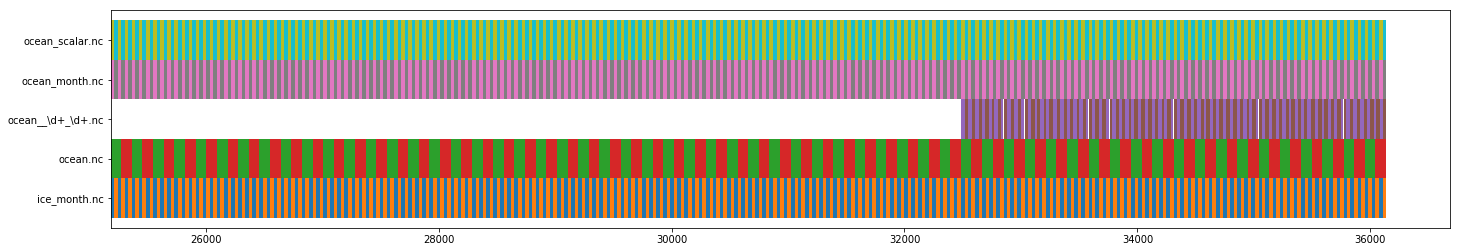

In [72]:
plt.figure(figsize=(24,4))

labels = []
for n, g  in enumerate(df.groupby('basename')):
    labels.append(g[0])
    T1 = g[1].T1
    DT = g[1].DT
    plt.barh(n*np.ones_like(DT[::2]), DT[::2], height=1, left=T1[::2])
    plt.barh(n*np.ones_like(DT[1::2]), DT[1::2], height=1, left=T1[1::2])

plt.yticks(range(len(labels)), labels)
#plt.xlim(34000, 34300)

plt.show()

## MOM-SIS 0.25$^\circ$ Diagnostics

| Experiment Name | Description |
|-----------------|-----------------|
|mom025_nyf | Original simulation, rerun from WOA13 initial conditions.|
|mom025_nyf_salt | As above, with new ew salt restoring file from WOA13 surface data. (Not running yet)|

## ACCESS-OM2-025 Preliminary Analysis

|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|025deg_jra55_ryf_spinup1 | JRA55 RYF9091| This is our initial 0.25° test. Ran for a decade before sea ice build-up overwhelmed us!  | Aborted after 10 years.| 
|025deg_jra55_ryf_spinup2 | JRA55 RYF9091| This is our initial 0.25° test with the sea ice parameter fixed. Less sea ice buildup, but there seems to be a problem with salinity conservation. It seems we are not doing runoff properly ... | Stopped at 50 years.| 
|025deg_jra55_ryf_spinup3 | JRA55 RYF9091| Third attempt at 0.25° test. This run is very unstable, and we think it might be something to do with runoff. Will try to fix this and start again. | Up to 8 years.| 
|025deg_jra55_ryf | JRA55 RYF9091| Latest attempt at 0.25° test.  | Started 5/8/17| 



## ACCESS-OM2 Preliminary Analysis

|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|1deg_jra55_ryf_spinup1 | JRA55 RYF9091| A short 10 year spinup with first pre-release code. Had bugs in runoff and salt fluxes.| Aborted after 10 years.| 
|1deg_jra55_ryf | JRA55 RYF9091| second attempt at 1° test. | Up to 50 years.| 

